# Section 12: Working With Dates & Times

In [1]:
from pathlib import Path

import pandas as pd

In [2]:
# Path to data directory
data_dir = Path.cwd() / "course_materials" / "data"

In [81]:
####### NOTE DATAFRAME NAME CHANGES TO MATCH COURSE
# Billboards Charts dataset
charts_df = pd.read_csv(data_dir / "billboard_charts.csv", parse_dates=["date"])

# UFO Reports dataset
ufos_df = pd.read_csv(data_dir / "nuforc_reports.csv")

### Converting With pd.to_datetime()

In [4]:
pd.to_datetime("2019-12-31")

Timestamp('2019-12-31 00:00:00')

In [5]:
dates = ["2019-12-31", "7:44:23 Jan. 2nd 2019", "April 3rd, 1989"]
pd.to_datetime(dates)

DatetimeIndex(['2019-12-31 00:00:00', '2019-01-02 07:44:23',
               '1989-04-03 00:00:00'],
              dtype='datetime64[ns]', freq=None)

### Specifying Fancy Formats With pd.to_datetime()

In [6]:
# Notice that the following data can be ambiguous since the reading of it
# depends on where you're from
pd.to_datetime("10/11/12")

Timestamp('2012-10-11 00:00:00')

In [7]:
pd.to_datetime("10/11/12", dayfirst=True)

Timestamp('2012-11-10 00:00:00')

In [8]:
pd.to_datetime("10/11/12", yearfirst=True)

Timestamp('2010-11-12 00:00:00')

In [9]:
pd.to_datetime("10/11/12", yearfirst=True, dayfirst=True)

Timestamp('2010-12-11 00:00:00')

In [10]:
# Using the `format` parameter is much more powerful
pd.to_datetime("10/11/12", format="%y/%m/%d")

Timestamp('2010-11-12 00:00:00')

In [11]:
meetings = [
    "Dec 11 2019 Meeting",
    "Jan 6 2020 Meeting",
    "Mar 19 2020 Meeting",
    "Apr 15 2020 Meeting",
]

In [12]:
pd.to_datetime(meetings, format="%b %d %Y Meeting")

DatetimeIndex(['2019-12-11', '2020-01-06', '2020-03-19', '2020-04-15'], dtype='datetime64[ns]', freq=None)

### Dates and DataFrames

In [13]:
ufos_df.head(3)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN


In [14]:
# date_time column is an object
ufos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   summary         88095 non-null  object 
 1   city            87891 non-null  object 
 2   state           82890 non-null  object 
 3   date_time       86938 non-null  object 
 4   shape           85627 non-null  object 
 5   duration        84954 non-null  object 
 6   stats           88088 non-null  object 
 7   report_link     88125 non-null  object 
 8   text            88070 non-null  object 
 9   posted          86938 non-null  object 
 10  city_latitude   72013 non-null  float64
 11  city_longitude  72013 non-null  float64
dtypes: float64(2), object(10)
memory usage: 8.1+ MB


In [15]:
pd.to_datetime(ufos_df["date_time"])

0       2019-12-12 18:43:00
1       2019-03-22 18:30:00
2                       NaT
3       2019-04-17 02:00:00
4       2009-03-15 18:00:00
                ...        
88120   2019-10-02 20:00:00
88121   2019-10-02 20:00:00
88122   2019-10-02 20:03:00
88123   2019-10-02 22:00:00
88124   2019-10-02 22:00:00
Name: date_time, Length: 88125, dtype: datetime64[ns]

In [16]:
ufos_df["date_time"] = pd.to_datetime(ufos_df["date_time"])

In [17]:
ufos_df["date_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88125 entries, 0 to 88124
Series name: date_time
Non-Null Count  Dtype         
--------------  -----         
86938 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 688.6 KB


In [18]:
pd.read_csv(data_dir / "nuforc_reports.csv", parse_dates=["date_time"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87891 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84954 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


### The Useful dt Properties

In [20]:
ufos_df["date_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88125 entries, 0 to 88124
Series name: date_time
Non-Null Count  Dtype         
--------------  -----         
86938 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 688.6 KB


<AxesSubplot:>

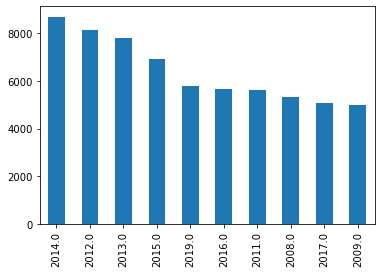

In [24]:
ufos_df["date_time"].dt.year.value_counts().head(10).plot(kind="bar")

In [26]:
ufos_df["date_time"].dt.month.value_counts()

7.0     10682
8.0      8997
9.0      8498
10.0     8371
6.0      8357
11.0     7596
12.0     6525
5.0      6063
1.0      5979
4.0      5817
3.0      5494
2.0      4559
Name: date_time, dtype: int64

In [29]:
ufos_df["date_time"].dt.day.value_counts().head()

1.0     4852
15.0    4403
4.0     3864
20.0    3016
12.0    2945
Name: date_time, dtype: int64

<AxesSubplot:>

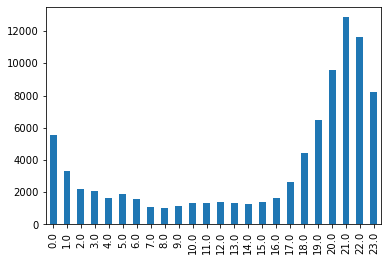

In [33]:
ufos_df["date_time"].dt.hour.value_counts().sort_index().plot(kind="bar")

### Comparing Dates

In [35]:
ufos_df[ufos_df["date_time"] < "1980"]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
8,Ufos report in Irving Texas at 2200 hrs. On or...,Dallas,TX,1973-07-14 22:00:00,oval,6 minutes,Occurred : 7/14/1973 22:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/145/S145751.html,Ufos report in Irving Texas at 2200 hrs. On o...,2019-04-25T00:00:00,32.835168,-96.808118
15,Strange bright light hovered over mobile home.,Gray Court,SC,1975-07-17 00:00:00,light,5 minutes,Occurred : 7/17/1975 00:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/147/S147117.html,Strange bright light hovered over mobile home....,2019-07-05T00:00:00,34.578800,-82.114100
31,Bright green round object quickly travelling e...,N. Cascades Nat. Park,WA,1979-07-15 23:00:00,light,2x ~10sec,Occurred : 7/15/1979 23:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/050/S50300.html,Bright green round object quickly travelling e...,2006-05-15T00:00:00,NaN,NaN
54,It was a full moon when my brother and I obser...,Lawrenceburg,KY,1969-06-01 21:00:00,disk,5 minutes,Occurred : 6/1/1969 21:00 (Entered as : 1969 ...,http://www.nuforc.org/webreports/049/S49947.html,It was a full moon when my brother and I obser...,2006-05-15T00:00:00,38.005200,-84.983000
55,"UFO over Orangevale, CA in May/June 1969",Orangevale,CA,1969-06-01 23:00:00,unknown,30 to 45 minutes,Occurred : 6/1/1969 23:00 (Entered as : 06/01...,http://www.nuforc.org/webreports/049/S49619.html,"UFO over Orangevale, CA in May/June 1969 My fi...",2006-05-15T00:00:00,38.684500,-121.222300
...,...,...,...,...,...,...,...,...,...,...,...,...
87166,VERY LARGE OBJECT- WHITE LIGHT ILLUMINATING MY...,Anoka,MN,1976-06-30 21:00:00,light,5 minutes,Occurred : 6/30/1976 21:00 (Entered as : 22:0...,http://www.nuforc.org/webreports/149/S149050.html,VERY LARGE OBJECT- WHITE LIGHT ILLUMINATING MY...,2019-10-04T00:00:00,45.287400,-93.433600
87167,"7 ""PEARLESCENT"" HIGH ALTITUDE CRAFT IN V FORMA...",Long Beach,CA,1976-11-18 13:00:00,circle,20 seconds,Occurred : 11/18/1976 13:00 (Entered as : 11/...,http://www.nuforc.org/webreports/149/S149389.html,"7 ""PEARLESCENT"" HIGH ALTITUDE CRAFT IN V FORMA...",2019-10-04T00:00:00,33.790023,-118.173105
87168,The even occurred North of Mt Calvary Rd on Ol...,Thomasville,NC,1977-04-14 23:00:00,disk,10 minutes,Occurred : 4/14/1977 23:00 (Entered as : 4/14...,http://www.nuforc.org/webreports/149/S149395.html,The even occurred North of Mt Calvary Rd on Ol...,2019-10-04T00:00:00,35.882600,-80.082000
87169,Triangle ship passed over silent with 7 green ...,Stratford,TX,1977-07-06 11:45:00,triangle,10 minutes,Occurred : 7/6/1977 11:45 (Entered as : 07/06...,http://www.nuforc.org/webreports/149/S149474.html,Triangle ship passed over silent with 7 green ...,2019-10-04T00:00:00,36.277900,-102.015600


In [37]:
ufos_df[ufos_df["date_time"] > "2019-12-23"]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
85714,7-8 elongated objects flying in straight line ...,Wilmington,NC,2019-12-29 20:40:00,cigar,10 seconds,Occurred : 11/29/2019 20:40 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151158.html,7-8 elongated objects flying in straight line ...,2019-12-01T00:00:00,34.238375,-77.878468


In [40]:
ufos_df[ufos_df["date_time"].dt.hour == 2.0].head(3)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
14,Bright Circle of Light followed me from Oskalo...,Centerville,IA,1999-08-15 02:30:00,circle,1 hour,Occurred : 8/15/1999 02:30 (Entered as : 08/1...,http://www.nuforc.org/webreports/146/S146702.html,Bright Circle of Light followed me from Oskalo...,2019-06-20T00:00:00,40.707400,-92.921300
148,Strange Vibrations...,Indianola,IA,1992-04-30 02:00:00,unknown,5 Minutes,Occurred : 4/30/1992 02:00 (Entered as : 04/3...,http://www.nuforc.org/webreports/050/S50488.html,Strange Vibrations... When I was young; about ...,2006-05-15T00:00:00,41.306800,-93.582600


In [42]:
ufos_df[ufos_df["date_time"].between("1988", "1989")].head(3)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
128,Triangle craft with one large softwhite light ...,Powhatan,VA,1988-03-08 05:20:00,triangle,12 sec.,Occurred : 3/8/1988 05:20 (Entered as : 03/08...,http://www.nuforc.org/webreports/049/S49538.html,Triangle craft with one large softwhite light ...,2006-05-15T00:00:00,37.553300,-77.934500
129,"-Working the night shift,and always watching t...",Woburn,MA,1988-06-20 01:00:00,light,12 minutes,Occurred : 6/20/1988 01:00 (Entered as : 6 20...,http://www.nuforc.org/webreports/050/S50574.html,"-Working the night shift,and always watching t...",2006-05-15T00:00:00,42.488858,-71.158917
130,one shining spiral moves fast from southwest ...,"Suzhou, Jiangsu (China)",NaN,1988-08-10 15:00:00,circle,5 minutes,Occurred : 8/10/1988 15:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/049/S49687.html,one shining spiral moves fast from southwest ...,2006-05-15T00:00:00,NaN,NaN


### Finding StarLink Flybys In UFO Dataset

In [51]:
# Notice the number of reports on the 22nd of December 2019
ufos_df[ufos_df["date_time"].between("2019-12-18", "2019-12-23")]["date_time"].dt.day.value_counts()

22    50
20    22
19    21
21    19
18    13
Name: date_time, dtype: int64

In [54]:
ufos_df["date_time"].dt.date.value_counts()

2015-11-07    290
2014-07-04    270
2010-07-04    210
2012-07-04    200
2013-07-04    185
             ... 
1980-09-12      1
1988-06-13      1
1981-07-29      1
2004-07-04      1
2003-09-07      1
Name: date_time, Length: 8351, dtype: int64

In [60]:
# StarLink date
recent_sightings = ufos_df[ufos_df["date_time"].dt.year >= 2018]
recent_sightings["date_time"].dt.date.value_counts().head(15)

2019-11-11    77
2019-05-25    69
2019-05-26    67
2019-05-24    60
2019-07-04    57
2019-11-24    50
2019-12-22    50
2019-10-05    49
2018-07-04    40
2019-09-21    40
2019-11-25    39
2019-09-19    38
2019-12-12    37
2019-11-12    36
2019-11-23    35
Name: date_time, dtype: int64

In [62]:
ufos_df[ufos_df["date_time"].between("2019-05-24", "2019-05-26")]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
1913,Were looking up at the stars and a string of w...,Fort Yates,ND,2019-05-24 00:00:00,unknown,3 minutes,Occurred : 5/24/2019 00:00 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146348.html,We were sitting outside looking up at the star...,2019-06-07T00:00:00,46.103500,-100.702900
1914,May 24th at approximately 0002 hours I witness...,Wilsonville,OR,2019-05-24 00:02:00,formation,2 minutes,Occurred : 5/24/2019 00:02 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146271.html,"May 24th, at approximately 0002 hours, I witne...",2019-06-07T00:00:00,45.308400,-122.779900
1915,30 white orbs. ((NUFORC Note: Satellites fro...,Mitchell,SD,2019-05-24 00:05:00,formation,1 minute,Occurred : 5/24/2019 00:05 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146355.html,"30 white orbs. On the Evening of May 24th, 201...",2019-06-07T00:00:00,43.718300,-98.026200
1916,seen a rip in the night sky.it looks like a br...,Hazel green,AL,2019-05-24 00:14:00,light,2 minutes,Occurred : 5/24/2019 00:14 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146455.html,seen a rip in the night sky.it looks like a bi...,2019-06-07T00:00:00,34.934100,-86.580300
1917,It was somewhat a slow moving blurry light obj...,Staunton,VA,2019-05-24 00:16:00,chevron,1+ minutes,Occurred : 5/24/2019 00:16 (Entered as : 5/24...,http://www.nuforc.org/webreports/146/S146265.html,This is what I saw. At west side Staunton cit...,2019-06-07T00:00:00,38.137038,-79.063041
...,...,...,...,...,...,...,...,...,...,...,...,...
2521,Intense Bright Flashes for Four Hours...,Hulett,WY,2019-05-26 00:00:00,light,4 hours,Occurred : 5/26/2019 00:00 (Entered as : 0526...,http://www.nuforc.org/webreports/146/S146274.html,Intense Bright Flashes for Four Hours... I wok...,2019-06-07T00:00:00,44.744400,-104.680400
2581,"We were outside, 11:54pm, saw 4 lights moving ...",Ocean Shores,WA,2019-05-26 00:00:00,light,4 to 5 min,Occurred : 5/26/2019 00:00 (Entered as : May ...,http://www.nuforc.org/webreports/146/S146440.html,"We were outside, 11:54pm, saw 4 lights moving ...",2019-06-07T00:00:00,46.972000,-124.143200
2582,"Reported seeing a triangle of lights, moving a...",Manitowish waters,WI,2019-05-26 00:00:00,triangle,15 minutes,Occurred : 5/26/2019 00:00 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146448.html,I did not see it but my friend and his son in ...,2019-06-07T00:00:00,NaN,NaN
2583,Formation of lights grows larger and passes ab...,Grants,AL,2019-05-26 00:00:00,formation,5 minutes,Occurred : 5/26/2019 00:00 (Entered as : 05/2...,http://www.nuforc.org/webreports/146/S146489.html,Formation of lights grows larger and passes ab...,2019-06-07T00:00:00,NaN,NaN


### Date Math & Timedeltas

In [63]:
ufos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87891 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84954 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


In [65]:
ufos_df["posted"] = pd.to_datetime(ufos_df["posted"])

In [66]:
ufos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87891 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84954 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  datetime64[ns]
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 8.1+ MB


In [67]:
ufos_df["posted"] - ufos_df["date_time"]

0          9 days 05:17:00
1          6 days 05:30:00
2                      NaT
3          0 days 22:00:00
4       3685 days 06:00:00
               ...        
88120      1 days 04:00:00
88121      1 days 04:00:00
88122      1 days 03:57:00
88123      1 days 02:00:00
88124      1 days 02:00:00
Length: 88125, dtype: timedelta64[ns]

In [68]:
ufos_df["time_before_reported"] = ufos_df["posted"] - ufos_df["date_time"]

In [72]:
longest_wait = ufos_df.sort_values("time_before_reported", ascending=False).head(10)

In [74]:
# Calculate the longest wait to report times in terms of years
longest_wait["time_before_reported"].dt.days / 365

86762    50.583562
87145    50.282192
721      50.175342
1576     50.101370
1580     49.972603
84984    49.586301
83965    49.213699
722      49.180822
723      49.052055
1301     48.967123
Name: time_before_reported, dtype: float64

In [75]:
ufos_df["years_before_reporting"] = ufos_df["time_before_reported"].dt.days / 365

In [79]:
ufos_df.sort_values("years_before_reporting", ascending=False).head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,time_before_reported,years_before_reporting
86762,An incomplete report given on behalf of anothe...,El Paso,TX,1969-06-01 00:00:00,other,3 minutes,Occurred : 6/1/1969 00:00 (Entered as : 1969 ...,http://www.nuforc.org/webreports/151/S151313.html,An incomplete report given on behalf of anothe...,2019-12-19,31.792328,-106.374849,18463 days 00:00:00,50.583562
87145,Strange globe sighting--1969.,Philadelphia,PA,1969-07-04 01:30:00,sphere,20 minutes,Occurred : 7/4/1969 01:30 (Entered as : 07/04...,http://www.nuforc.org/webreports/149/S149273.html,Strange globe sighting--1969. Thank you for al...,2019-10-04,39.990635,-75.145801,18353 days 22:30:00,50.282192
721,It was July 1969 on a clear summer evening in ...,New Castle,PA,1969-07-01 21:00:00,disk,45 seconds,Occurred : 7/1/1969 21:00 (Entered as : July ...,http://www.nuforc.org/webreports/147/S147922.html,It was July 1969 on a clear summer evening in ...,2019-08-23,41.001224,-80.319468,18314 days 03:00:00,50.175342
1576,1969 olive branch Mississippi large round ligh...,Olive Branch,MS,1969-06-30 00:00:00,light,5 minutes,Occurred : 5/30/1969 20:30 (Entered as : Summ...,http://www.nuforc.org/webreports/147/S147576.html,1969 olive branch Mississippi large round ligh...,2019-07-25,34.918000,-89.821600,18287 days 00:00:00,50.101370
1580,Six bright lights in &quot;V&quot; formation s...,Westport,MA,1969-08-15 16:00:00,formation,8-10 secs,Occurred : 8/15/1969 16:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/147/S147589.html,Six bright lights in &quot;V&quot; formation s...,2019-07-25,NaN,NaN,18240 days 08:00:00,49.972603


### Billboard Charts Dataset Exploration

In [82]:
charts_df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [83]:
charts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            330087 non-null  datetime64[ns]
 1   rank            330087 non-null  int64         
 2   song            330087 non-null  object        
 3   artist          330087 non-null  object        
 4   last-week       297775 non-null  float64       
 5   peak-rank       330087 non-null  int64         
 6   weeks-on-board  330087 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 17.6+ MB


<AxesSubplot:>

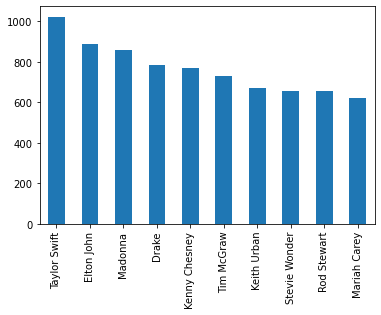

In [86]:
charts_df["artist"].value_counts().head(10).plot(kind="bar")

In [87]:
number_1s = charts_df["rank"] == 1
charts_df[number_1s]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
100,2021-10-30,1,Easy On Me,Adele,68.0,1,2
200,2021-10-23,1,Industry Baby,Lil Nas X & Jack Harlow,2.0,1,12
300,2021-10-16,1,Stay,The Kid LAROI & Justin Bieber,2.0,1,13
400,2021-10-09,1,My Universe,Coldplay x BTS,NaN,1,1
...,...,...,...,...,...,...,...
329587,1958-09-01,1,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,2.0,1,5
329687,1958-08-25,1,Little Star,The Elegants,2.0,1,4
329787,1958-08-18,1,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,2.0,1,3
329887,1958-08-11,1,Poor Little Fool,Ricky Nelson,1.0,1,2


<AxesSubplot:>

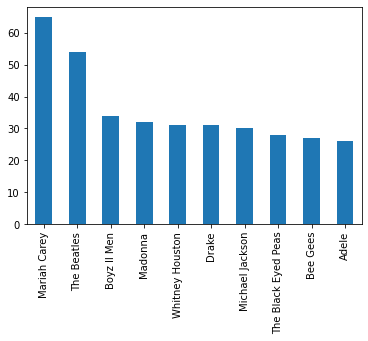

In [88]:
charts_df[number_1s]["artist"].value_counts().head(10).plot(kind="bar")

In [91]:
charts_df[number_1s]["song"].value_counts()

Old Town Road                               19
Despacito                                   16
One Sweet Day                               16
Rockstar                                    15
I'll Make Love To You                       14
                                            ..
Then Came You                                1
You Haven't Done Nothin                      1
You Ain't Seen Nothing Yet/Free Wheelin'     1
Whatever Gets You Thru The Night             1
I'll Take You There                          1
Name: song, Length: 1104, dtype: int64

In [95]:
charts_df[charts_df["song"] == "Old Town Road"].set_index("date").head()

,rank,song,artist,last-week,peak-rank,weeks-on-board
date,,,,,,
2020-01-18,46,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,15.0,1,45
2020-01-11,15,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,34.0,1,44
2020-01-04,34,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,41.0,1,43
2019-12-28,41,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,39.0,1,42
2019-12-21,39,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,31.0,1,41


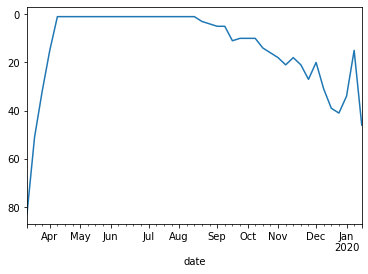

In [99]:
p = charts_df[charts_df["song"] == "Old Town Road"].set_index("date")["rank"].plot()
p.invert_yaxis()